# EDSA INTERNSHIP: GROCERY SHOPPING PRICE OPTIMIZER
Done by: 

         1.Melania Makombe
         2.Jeniffer Mariga
         3.Ogaga Oghenekohwo
         4.Shola Ogunyemi
         5.Michael Dairo
         6.Unigwe Uchenna
     
     
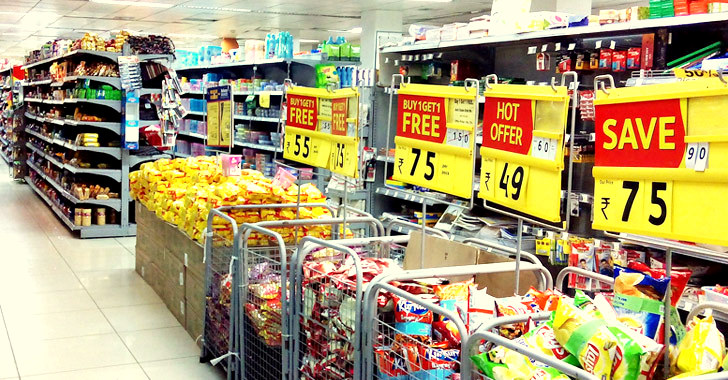

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

- <a href=#two>1.1 Overview</a>

- <a href=#two>1.2 Problem Statement</a>

<a href=#two>2. Loading Dependencies</a>

- <a href=#two>2.1 Import the libraries</a>

- <a href=#two>2.2 loading the data</a>

- <a href=#two>2.3 Data description and Summary Statistics </a>

<a href=#three>3. Methodology</a>

<a href=#four>4. Memoization</a>

<a href=#five>5. Conclusion</a>


<a id="one"></a>
## 1. Introduction
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Overview

In South Africa most women visit a grocery at least once a week and every month end  for bulk shopping (News24,  2019). According to  Nielsen 80 percent of these women purchase their groceries from  at least 5 supermarkets at an average expenditure of R220 (News24, 2019).While South African women get paid 30% less than men (News24,2020), they also have longer working hours.  This means that they have less buying power and less time to spend on shopping activities. Team 1 Explore Data Science Interns have created a web application solution to solve these problems for shoppers. 

This paper aims to give a detailed overview of the solution. The first section will discuss the literature review. In this section the problem statement is defined and research found on the problem or similar problems will be discussed. As well as information on possible solutions will be discussed, The second section is the methodology. In this section, the methods used to solve this problem will be discussed on detail. Then the results will be communicated. Thereafter in project discussion, the project results are discussed and recommendations are given. Then finally the conclusion will summarize everything.


### Problem Statement

Grocery shoppers struggle to determine the availability of item at grocery stores, and most times do not take advantage of price disparity to get the best deals.

It becomes imperative to develop a service that provides shopper with the most current deals and price information of items to improve their shopping experience and reduce cost.


<a id="two"></a>
## 2. Loading Dependencies
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### Import the libraries

In [2]:
# Library for text extraction
import re
# Library for time manipulation
import time
# Library to generate random figures
import random
# Library to control python's future warnings
import warnings
# Libraries for data manipulation
import numpy as np
import pandas as pd
# Library for HTML parsing for web scraping
from bs4 import BeautifulSoup as soup
# Libraries for web brower manipulation and web scraping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
# Ignore all future warnings
warnings.filterwarnings('ignore')

### Loading the data

#### Data Source

Data for the application will be scraped daily from the websites of four grocery stores
([shoprite](https://www.shoprite.co.za), [Checkers](https://www.checkers.co.za/), [Woolworths](https://www.woolworths.co.za/), and Pick n’ Pay).

According to wikipedia __"Web-Scraping is the process of extracting data in diverse volumes in a specific format from a website(s) in the form of slice and dice for Data Analytics and Data Science standpoint and file formats depending on the business requirements".__ So webscraping tools basically crawls the entire website and extracts the relevant information.

Selenium and BeautifulSoup are the most common open source libraries that are used for webscraping and both of the libraries will be used for this application.



#####  Selenium

Selenium is a powerful automation tool that is basically used to test web applications. It is compatible with different programming languages and supports a wide variety of browsers such as Chrome, Firefox, Safari, etc. WebDriver is the main component of Selenium which is used to interact with the web browser.

#####  BeautifulSoup

BeautifulSoup is a python library that is used for getting data from HTML, XML, and any other markup language. You can use it to extract tables, lists, paragraphs and you can also put filters to extract information from web pages. It is a tool that also helps you clean up and parse the documents you have pulled down from the web.





### Data Description

For the base version of the app we are interested groceries like:
   * Mealie meal    
   * Rice 
   * Sugar 
   * Salt 
   * Flour 
   * Egg
   * Milk
   * Coffee
   * Tea 
   * Sanitary pads
   * Cooking oil 
   * Beef /kg
   * Chicken /kg
   * Pork/kg
   * Onion/kg 
   * Tomato/kg 
   * Butter 
   * Cheese 
   * Yogurt 



The following attributes for the above products will be scraped from the stores website and be used to improve the user's experience when interacting with the application.

 * Product Name - name of the scraped product
 * Product Description - all the information and details of the product
 * Type of Promo, if any
 * Promo Duration, if any
 * Product Price (Before promo, if any)
 * Promo Price (if any)
 * Product Image


<a id="three"></a>
## 3. Methodology
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Below is the overview of the algorithm that implements the store recommendation feature.The user may query any number of products available in the user basket that they are interested in buying .The webscraping script  then traverses through the URLs of the stores of interest and defaults to the user's location . It then scrapes the current prices of the products and other required atttributes from website pages.Once the prices are scraped the total sum of products in the user's basket for each of these stores  are compared and the  algorithm outputs the receipt for the stores and also the recommended store.

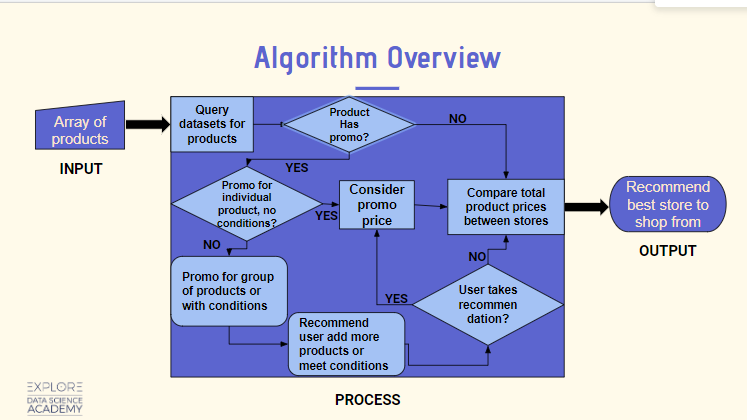

__setting up urls to websites of interest__

In [ ]:
### SETTING UP URLS TO WEBSITES OF INTEREST ###

# Pick n' pay's urls
PNP_SEARCH_URL = 'https://www.pnp.co.za/pnpstorefront/pnp/en/search/?text='
PNP_URL = 'https://www.pnp.co.za'
# Shoprite urls
SHOPRITE_SEARCH_URL = 'https://www.shoprite.co.za/search/all?q='
SHOPRITE_URL = 'https://www.shoprite.co.za'
# Checkers urls
CHECKERS_SEARCH_URL = 'https://www.checkers.co.za/search/all?q='
CHECKERS_URL = 'https://www.checkers.co.za'
# Woolworths urls
WOOLWORTHS_SEARCH_URL = 'https://www.woolworths.co.za/cat?Ntt='
WOOLWORTHS_URL = 'https://www.woolworths.co.za'

### SET REGION OF INTEREST ###

REGION = 'cape town'

__Setting up the region of interest__

Here we will use selenium to automate the button clicks on each website and set the regions to the region of interest.The selenium webdriver does this by opening up the Chrome Browserand  going to the url specified in the class instantiation.It also disables the website objects that could potentially slow sown the page load eg. images, extensions and infobars.

However Javascript which can also lead to slow page load can not be disabled because many operations that are intended to be done with selenium are heavily dependent on the Javascript for the website to be enabled.However tricks like memoization in JavaScript can be used to help speed up our code.

After setting the region selenium finds the stores button and choses the store that is closest to the users location.

In [ ]:
class SetRegion:
    """
    Class to set the region on each website, where possible, to
    the region of interest for all the stores of interest
    
    Params:
        * store : Url of store of interest
        
    Functions:
        * get_store() - Initial configuring and opening up store's base url
        * pick_n_pay_location() - Changes location and gets a perculiar driver for pick n' pay
        * shoprite_checkers_location() - Changes location and get a perculiar driver for shoprite and checkers
        * woolworths() - Gets driver for woolworths
    """
    
    def __init__(self, store):
        """
        Class instance initializer
        """
        self.store = store
        
    def get_store(self):
        """
        Opens up the Chrome Browser goes to the url specified in the class instantiation, 
        with several parameters to disable website objects that can potentially 
        slow down the page load such as; images, extensions and infobars.
        
        Javascript which can also lead to slow page load can not be disabled 
        because many operations that are intended to be done with selenium
        are heavily dependent on the Javascript for the website to be enabled.
        
        Params: None
        
        Returns: A driver object perculiar to a store's url
        """
        
        chrome_options = webdriver.ChromeOptions() # create chrome_options object
        prefs = {"profile.managed_default_content_settings.images": 2} # disable images
        chrome_options.add_experimental_option("prefs", prefs) # set disable images object
        chrome_options.add_argument("--disable-extensions") # disable extensions
        chrome_options.add_argument("disable-infobars") # disable infobars
        options = Options()  # create an options object
        options.headless = False # allow user interface pop up
        options.add_argument('user-agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 \
                            (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36"') # set user agents
        driver = webdriver.Chrome(options=options, chrome_options=chrome_options) # create driver object with options and chrome_options
        driver.implicitly_wait(5) # make driver wait implicitly for set time
        time.sleep(3) # pause execution for 3 secs
        
        try:
            driver.get(self.store) # get store web page

        except Exception:
            print('waiting for full page load...') # wait for full page load
            time.sleep(10) # pause
        # return driver object
        return driver
    
    def pick_n_pay_location(self):
        """
        Changes the default location for pick n' pay store to a store 
        in the preferred region 
        
        Params: None
        
        Returns: A driver object perculiar to pick n' pay
        """
        driver = self.get_store() # get pick n' pay web page
        # locate the initial modal class to accept or reject cookies
        custom_modal = driver.find_element(By.CLASS_NAME, 'modal-footer')
        # locate the first button of the modal class
        close_button = custom_modal.find_element(By.TAG_NAME, 'button')
        time.sleep(5) # pause 
        # click on the button to clear the modal
        close_button.send_keys(Keys.RETURN)
        # locate the region selector
        button_loc = driver.find_element(By.CLASS_NAME, 'js-region-base-store-display-area')
        button = button_loc.find_element(By.TAG_NAME, 'a')
        time.sleep(2) # pause
        button.click() # click the region selector button
        # get the last region "west cape"
        region_button = driver.find_elements(By.CLASS_NAME, 'js-region-key')[-1]
        time.sleep(2) # pause
        # click on the selected region
        region_button.click()
        # get the first region in 'west cape' - the selected region
        wanted_store_button = driver.find_elements(By.CSS_SELECTOR, 'div[data-region-key="Western Cape"]')[0]\
                                .find_element(By.TAG_NAME, 'p')
        time.sleep(2) # pause
        # click on the first region in 'west cape'
        wanted_store_button.click()
        time.sleep(3) # pause
        
        # return driver object
        return driver
    
    def shoprite_checkers_location(self):
        """
        Changes the default location for shoprite and checkers stores to a store 
        in the preferred region and a store that is the closest to the 
        user's current position.
        
        Params: None
        
        Returns: A driver object perculiar to shoprite or checkers
        """
        driver = self.get_store() # get checkers or shoprite web page
        # locate region selector button
        store_button = driver.find_element(By.CLASS_NAME, 'header__your-store')
        time.sleep(3) # pause
        # click store selection button
        store_button.click()
        # locate input box for searching for regions
        input_box = store_button.find_element(By.ID, 'storeFinderInput')
        # clear the input box 
        input_box.clear()
        time.sleep(2) # pause
        # iterate through characters in the preferred region
        for char in REGION:
            # input characters one after the other into the input box
            input_box.send_keys(char)
            # pause at random times between .1sec and .5secs
            time.sleep(round(random.uniform(.1, .5),2))
        # hit enter to search for region inputted
        input_box.send_keys(Keys.ENTER)
        time.sleep(2) # pause
        # get all stores found in the region
        stores = driver.find_elements(By.CLASS_NAME, 'nav-store-your-results')
        time.sleep(3) # pause
        # empty list to hold stores and their distance relative to the user
        stores_list = []
        # iterate through the stores (web elements) found
        for store in stores:
            # extract the name from the store web element
            store_name = store.find_element(By.TAG_NAME, 'a').get_attribute('innerHTML').strip()
            time.sleep(1) # pause
            # extract the distance from the store web element
            store_distance = store.find_element(By.CLASS_NAME, 'store-distance')\
                            .find_element(By.TAG_NAME, 'span').get_attribute('innerHTML').strip()
            # append the store name and the store distance to the empty list created prior
            stores_list.append((store_name, store_distance))
        # sort the stores list by their distance in ascending order
        stores_list.sort(reverse=True, key=lambda x: x[1])
        # extract the nearest store - store with minimum distance
        nearest_store = stores_list[-1][0]
        # clear input box
        input_box.clear()
        time.sleep(2)# pause
        # iterate through the characters of the nearest store
        for char in nearest_store:
            # send each character to the input box
            input_box.send_keys(char)
            # pause at random times
            time.sleep(round(random.uniform(.1, .5),2))
        # hit enter to search for inputed store
        input_box.send_keys(Keys.ENTER)
        time.sleep(2) # pause
        # get the first store to appear
        store_wanted = driver.find_element(By.CLASS_NAME, 'nav-store-your-results')
        time.sleep(2) # pause
        # locate container containing the button to set store as default
        select_store_button_container = store_wanted.find_element(By.CLASS_NAME, 'sl-container')
        time.sleep(2) # pause
        # select button to set store as default
        button = select_store_button_container.find_element(By.TAG_NAME, 'button')
        time.sleep(3) # pause
        # click button to set store as default
        button.click()
        time.sleep(1) # pause
        # return driver perculiar to shoprite and checkers
        return driver
    
    def woolworths(self):
        """
        Function to get the perculiar web driver for woolworths.
        Woolworths has no option for region selection.
        """
        driver = self.get_store() # get woolworths web page
        # return woolworths peculiar driver
        return driver

__Data scraping using beautiful soup__

 After choosing the stores of interest,beautiful soup loads the page source and extracts the following details from each of the stores:
 * Name
 * Price
 * Promo status
 * Promo price
 * Max purchase order
 * URL of the item
 * Image URL
 * Product brand
    

In [ ]:
class ScrapePage:
    """
    Class to scrape the web page of interested stores
    
    Params:
        * item - Grocery product of interest
        * store_url - Interested store's base url
        * store_search_url - Interested store's search url
        * driver - Driver object perculiar to store of interest
    
    Functions:
        * store_page() - Searches for a product and returns a souped search result
        
    """
    
    def __init__(self, item, store_url, store_search_url, driver):
        """
        Class instance initializer
        """
        self.item = item
        self.store_url = store_url
        self.store_search_url = store_search_url
        self.driver = driver
    
    def store_page(self):
        """
        Search store of interest for item of interest
        
        Returns: A beautiful soup parsed object
        """
        try:
            # get web page of search result
            self.driver.get(self.store_search_url+self.item+'&Dy=1')
        except Exception:
            # wait for full page load
            print('waiting for full page load')
            time.sleep(10) # pause
        # using beautiful soup, parse the page source from gotten web page
        page_soup = soup(self.driver.page_source, 'html.parser')
        # return beautiful soup parsed object
        return page_soup    
    

In [ ]:
class ScrapeProducts:
    """
    Class to extract grocery products details from the souped html
    
    Params:
        * item - Product of interest
        * store_url - Base url of store of interest
        * store_search_url - Search url of store of interest
        * store - Store of interest
        * driver - Perculiar driver of the store of interest
        
    Functions:
        * page() - Creates `ScrapePage` instance
        * pick_n_pay() - Extracts products from pick_n_pay souped search results
        * checkers_shoprite() - Extracts products from checkers and shoprite souped search results
        * woolworths() - Extracts products from woolworths souped search results
    """
    
    def __init__(self, item, store_url, store_search_url, store, driver):
        """
        Class instance initializer
        """
        self.item = item
        self.store_url = store_url
        self.store_search_url = store_search_url
        self.store = store
        self.driver = driver
    
    def page(self):
        """
        Creates a ScrapePage instance
        """
        # create ScrapePage instance
        page = ScrapePage(self.item, self.store_url, self.store_search_url, self.driver)
        # return ScrapePage instance
        return page
    
    
    def pick_n_pay(self):
        """
        Function to extract all the product brands on a souped search page html for product of interest
        
        Returns: A list of dictionaries containing product details from pick n' pay
        """
        # call page function
        page = self.page()
        # get souped search page html
        page_soup = page.store_page()
        # locate the containers holding the products and their details
        products_container = page_soup.find_all('div', class_='product-card-grid')
        # empty list to hold dictionary of product details
        products = []
        # iterate through all the product containers found
        for product in products_container:
            # empty dictionary to hold details of each product
            product_dict = {}
            # locate and extract the name of the product
            name = product.find('div', class_='item-name').get_text()
            # locate and extract the price of the product
            # strip all white spaces(newlines, tabs, spaces) and currency symbol 'R'
            price = product.find('div', class_='product-price').find('div', class_='item-price')\
                            .find('div', class_='currentPrice').get_text()\
                            .strip('\n').strip('\t').lstrip('R').strip()
            # pick n pay prices are not separated by decimal('.')
            # decimal will be added
            l_price = list(price)
            l_price.insert(-2, '.')
            # locate and extract product link
            url = product.find('a')['href']
            # locate and extract product image
            image = product.find('img')['src']
            # locate and extract product promo
            promo = product.find('div', id='promotionContainer').get_text().strip('\t').strip('\n').strip()
            
            try:
                # extract promo price if any
                promo_price = float(re.search(r'\d+[\.]?\d+', promo_price).group())
            
            except Exception:
                # set promo price to None if not found
                promo_price = None
            # locate and extract minimum and maximum orders 
            min_max_purchase = product.find('div', class_='minMaxQuantityMsgContainer')\
                                .get_text().strip('\n').strip()  
            # build product details
            product_dict['Name'] = name # add name to dictionary
            product_dict['Price'] = float(''.join(l_price)) # add price to dictionary
            product_dict['Promo'] = promo if promo else None # add promo to dictionary
            product_dict['Promo price'] = promo_price # add promo price to dictionary
            product_dict['Min_Max'] = min_max_purchase if min_max_purchase else None # add min max purchase order
            product_dict['Url'] = self.store_url + url # add products url to dictionary
            product_dict['Image'] = image # add product's image link to dictionary
            # append product details to list of products
            products.append(product_dict)
        # return product details
        return products
        
    def checkers_shoprite(self):
        """
        Function to extract all the product brands on a souped search page html for product of interest
        
        Returns: A list of dictionaries containing product details from checkers and shoprite
        """
        # call page function
        page = self.page()
        # get souped search page html
        page_soup = page.store_page()
        # locate container holding products and their details
        item_div = page_soup.find_all('div', class_='item-product')
        # empty list to hold dictionaries of products details
        products = []
        # iterate through every item in the list of items
        for item in item_div:
            # empty dictionary to hold product details
            product_dict = {}
            # locate and extract the product name
            name = item.find('h3', class_='item-product__name').get_text().strip()
            # locate and extract the product price
            price = item.find('div', class_='special-price__price').get_text().strip().lstrip('R')
            # locate and extract the product url
            url = item.find('div', class_='item-product__image').find('a')['href']
            # locate and extract the product image
            image = item.find('div', class_='item-product__image').find('a').find('img')['src']
            
            try:
                # if product is on promo, locate and extract promo details and
                # extract promo price
                promo = item.find('div', class_='special-price__extra__price').find('span', class_='now').get_text().strip()
                promo_price = float(re.search(r'\d+[\.]\d+', promo)).group()
            except Exception:
                # if no promo found, set promo and promo price to None
                promo = None
                promo_price = None
            
            try:
                # check for promo validity
                validity = item.find('span', class_='item-product__valid').get_text().strip('\n').strip()
            except Exception:
                # set validity to None if no validity found
                validity = None
            # build product details
            product_dict['Name'] = name # add product name to dictionary
            product_dict['Price'] = float(re.search(r'\d+\.\d+', price).group()) # add product price to dictionary
            product_dict['Promo'] = promo # add promo details to dictionary
            product_dict['Promo price'] = promo_price # add promo price to dictionary
            product_dict['Validity'] = validity # add promo validity to dictionary
            product_dict['Url'] = self.store_url+url # add product url to dictionary
            product_dict['Image'] = self.store_url+image # add product image to dictionary
            # append product details to list of products
            products.append(product_dict)
        # return products details 
        return products
    
    
    def woolworths(self):
        """
        Function to extract all the product brands on a souped search page html for product of interest
        
        Returns: A list of dictionaries containing product details from woolworths
        """
        # call page function
        page = self.page()
        # get souped search page html
        page_soup = page.store_page()
        # locate container holding products and their details
        products_container = page_soup.find_all('div', class_='product-list__item')
        # empty list to hold dictionaries of products details
        products = []
        # iterate through every item in the list of items
        for product in products_container:
            # empty dictionary to hold product details
            product_dict = {}
            
            try:
                # locate and extract the product name
                name = product.find('div', class_='product-card__name').get_text().strip('\n').strip('\t').strip()
            except Exception:
                # set to unknown if no product name
                name = "Unknown"
            try:
                # locate and extract the product price
                price = eval(product.find('strong', class_='price').get_text().strip('\n').strip('\t').strip().lstrip('R'))
            except Exception:
                # set to None if no price found
                price = None

            try:
                # locate and extract price before promo
                promo_original_price = eval(product.find('strong', class_='price--strikethrough price--original')\
                                            .get_text().strip('\n').strip('\t').strip().lstrip('R'))
            except Exception:
                # if no promo, set to None
                promo_original_price = None
            # set promo price to None
            promo_price = None
            # check if price before promo exists
            if promo_original_price:
                # set promo price to the previously extracted price
                # because on the website, if there's a promo, the 
                # promo price is put in the same position where
                # the regular price should be
                promo_price = price
                # set price to be original price that has been moved
                # to a different position
                price = promo_original_price\
                
            try:
                # locate and extract the product image
                image = product.find('div', class_='product--image').find('img')['src']
            except Exception:
                # set to None if not found
                image = None
            # locate and extract the product url
            url = self.store_url+product.find('a', href=True)['href']
            # build product details
            product_dict['Name'] = name # add product name to dictionary
            product_dict['Price'] = float(price) # add product price to dictionary
            product_dict['Promo price'] = promo_price # add promo price to dictionary
            product_dict['Url'] = url # add product url to dictionary
            product_dict['Image'] = image # add product image to dictionary
            # append product details to products list
            products.append(product_dict)
        # return list of products
        return products
        

__Data Processing__

The data scraped is then processed so that only the products that match the queried products are given as an output,or all products if no match is found.
The price is then set based on various factors.:

            1. if there is a promo price, set price to promo price, else
                set original price as price
                
            2. if promo price is greater than original price, because the 
                promo is for a set of products or a bundle of products, set
                price to regular product price
        
            3. if the store is a checkers or shoprite store, if the promo
                is dependent on if the user has an Xtra savings card from 
                either store depending on what the store of interest is, if 
                'yes', set the price to the accompanying promo price else,
                set the price to the original price


In [ ]:
class ProcessItem:
    """
    Class to process all the data gotten from scraping process for an item
    
    Params:
        * products_dict - Dictionary containing details of all the products gotten from an item search
        * checkers_card - If the user has the checkers xtra savings card
        * shoprite_card - if the user has the shoprite xtra savings card
        * item - Product that is being processed 
        * store - Store that is being considered
        
    Functions:
        * match_product_url - Get all products that match only the item(product) of interest
        * get_item_price - Considering varying factors, set the appropriate price for an item or product
    """
    
    def __init__(self, products_dict, checkers_card, shoprite_card, item, store):
        """
        Class instance initializer
        """
        self.products = products_dict
        self.checkers_card = checkers_card
        self.shoprite_card = shoprite_card
        self.store = store
        self.item = item

    def match_product_url(self):
        """
        Function to find products in a list of products that match the item of interest
        
        Returns: A list of products that match the item of interest or all products
                if no match is found
        """
        # set pattern for item or product to match
        pattern = r'([\w+-/%?:\.]+' + str(self.item.replace(' ', '\-')) + '[\w+-/%?]+)'
        # list to hold all products that match set pattern
        wanted_products = []
        # list to hold products if no match is found
        all_products = []
        # iterate through products
        for product in self.products:
            # check for a match
            match = re.match(pattern, product['Url'].lower())

            if match:
                # append product to list of products that match pattern
                wanted_products.append(product)

            else:
                # append product to list of products that do not match pattern
                all_products.append(product)
        # return products that do not match pattern if the length
        # of the list of products that match the pattern is 0
        return all_products if len(wanted_products) == 0 else wanted_products

    def get_item_price(self):
        """
        Function to set the price of an item depending on factors such as;
            1. if there is a promo price, set price to promo price, else
                set original price as price
                
            2. if promo price is greater than original price, because the 
                promo is for a set of products or a bundle of products, set
                price to regular product price
        
            3. if the store is a checkers or shoprite store, if the promo
                is dependent on if the user has an Xtra savings card from 
                either store depending on what the store of interest is, if 
                'yes', set the price to the accompanying promo price else,
                set the price to the original price
        
        Returns: The product and the product price
        """
        # call match_product_url function
        products = self.match_product_url()
        # create a dictionary of products in form of a menu
        desired_products = [{y: x['Name']} for y, x in enumerate(products, start=1)]
        # print menu
        print(desired_products)
        # control choice of product
        while True:
            try:
                # take user input for product they want
                user_desired_brand = int(input('select choice product [Enter Numbers] > '))
                break
            except Exception:
                # notify user they have made a wrong input
                print('You have made an invalid choice. Enter matching product numbers')
                continue
        # empty string to hold user's desired product
        product_name = ''
        # iterate through item-matched products menu
        for product in desired_products:
            # iterate through the product in the menu
            for idx, name in product.items():
                # compare user choice to product in menu
                # if product in menu, set empty string to product name
                if idx == eval(user_desired_brand):
                    product_name += name
        # iterate through products list (products details)
        for product in products:
            # if the product name matches the product selected by the user
            if product['Name'] == product_name:
                # check for conditions about the store (checkers), the user and the promo type (with xtra savings card or not)
                if self.store == "checkers" and re.match(r'with card', product['Name']) and self.checkers_card.lower() == 'y':
                    # set price accordingly
                    price = product['Promo price'] if product['Promo price'] and product['Promo price'] < product['Price'] else product['Price']
                # check for conditions about the store (shoprite), the user and the promo type (with xtra savings card or not)
                elif self.store == "shoprite" and re.match(r'with card', product['Name']) and self.shoprite_card.lower() == 'y':
                    # set price accordingly
                    price = product['Promo price'] if product['Promo price'] and product['Promo price'] < product['Price'] else product['Price']
                # if stores not shoprite nor checkers
                else:
                    # set price accordingly
                    price = product['Promo price'] if product['Promo price'] and product['Promo price'] < product['Price'] else product['Price']
                # return product name and price
                return product['Name'], price

__Best shop recommendation__

Now that we have extracted all the desired data, we are ready to compare all the prices and make a recommendation tothe buyer.
The following function does that for us by bringing the whole script together and producing a script for each store. The contains the product name and its respective price and also the total price  for all the products in the basket.
The total price in each store is then compared and finally the store with the lowest total price is recommended to the user.

In [ ]:
def main():
    """
    Function that brings the script all together
    
    Returns: A receipt for each store containing price detail of 
            each item in the user basket
    """
    # the user basket containing items of interest
    USER_BASKET = ['sugar 1kg', 'rice 1kg']
    # ask the user if the possess the necessary cards
    # required to benefit from some promos particularly
    # in checkers and shoprite
    while True:
        try:
            CHECKERS_CARD = input("Do you have a checkers Xtra savings card?[Y/n] > ")
            break
        except Exception:
            print("Your input is invalid, choose from [Y/n]")
            continue
    while True:
        try:
            SHOPRITE_CARD = input("Do you have a shoprite Xtra savings card?[Y/n] > ")
            break
        except Exception:
            print("Your input is invalid, choose from [Y/n]")
            continue
    # empty dictionary to hold totals for each store
    STORES_TOTALS = {}
    # empty lists to hold dictionaries of products and their relative prices
    # for all stores
    pnp_df = []
    woolworths_df = []
    # checkers_df = [] # UNCOMMENT
    # shoprite_df = [] # UNCOMMENT
    
    ### GET ALL STORES DRIVERS AND ADD EACH STORE'S DRIVER TO ITS CODE BLOCK
    # pnp
    pnp_region = SetRegion(PNP_URL)
    pnp_driver = pnp_region.pick_n_pay_location()
    
    # woolworths
    woolworths = SetRegion(WOOLWORTHS_URL)
    woolworths_driver = woolworths.woolworths()
    
    # checkers
    # checkers_region = SetRegion(CHECKERS_URL)                      # UNCOMMENT
    # checkers_driver = checkers_region.shoprite_checkers_location() # UNCOMMENT
    
    # shoprite
    # shoprite_region = SetRegion(SHOPRITE_URL)                      # UNCOMMENT
    # shoprite_driver = shoprite_region.shoprite_checkers_location() # UNCOMMENT
    
    # iterate through every item in the user basket
    for item in USER_BASKET:
        # empty dictionaries to hold each product and its price
        pnp = {}
        woolworths = {}
        # checkers = {}  # UNCOMMENT
        # shoprite = {}  # UNCOMMENT
        
        
        # PICK_N_PAY
        pnp_store = "pick n' pay" # set store name
        # scrape products
        sp_pnp = ScrapeProducts(item, PNP_URL, PNP_SEARCH_URL, pnp_store, pnp_driver)
        # get list of products
        pnp_products = sp_pnp.pick_n_pay()
        # process the products list
        pnp_basket = ProcessItem(pnp_products, CHECKERS_CARD, SHOPRITE_CARD, item, pnp_store)
        # get product and its price
        pnp_item, pnp_item_price = pnp_basket.get_item_price()
        # add product and its price to store dictionary
        pnp['product'] = pnp_item
        pnp['price'] = pnp_item_price
        # add item price to total cost of products for the store
        if pnp_store in STORES_TOTALS.keys():
            STORES_TOTALS[pnp_store] += pnp_item_price
        
        else:
            STORES_TOTALS[pnp_store] = pnp_item_price
            
        # WOOLWORTHS
        woolworths_store = 'woolworths' # set store name
        # scrape products
        sp_woolworths = ScrapeProducts(item, WOOLWORTHS_URL, WOOLWORTHS_SEARCH_URL, woolworths_store, woolworths_driver)
        # get list of products
        woolworths_products = sp_woolworths.woolworths()
        # process the products list
        woolworths_basket = ProcessItem(woolworths_products, CHECKERS_CARD, SHOPRITE_CARD, item, woolworths_store)
        # get product and its price
        woolworths_item, woolworths_item_price = woolworths_basket.get_item_price()
        # add product and its price to store dictionary
        woolworths['product'] = woolworths_item
        woolworths['price'] = woolworths_item_price
        # add item price to total cost of products for the store
        if woolworths_store in STORES_TOTALS.keys():
            STORES_TOTALS[woolworths_store] += woolworths_item_price
        
        else:
            STORES_TOTALS[woolworths_store] = woolworths_item_price
        
        # CHECKERS
        # UNCOMMENT DOWN
        # checkers_store = 'checkers'  # set store name  
        ## scrape products
#         sp_checkers = ScrapeProducts(item, CHECKERS_URL, CHECKERS_SEARCH_URL, checkers_store, checkers_driver)
        ## get list of products
#         checkers_products = sp_checkers.checkers_shoprite()
        ## process the products list
#         checkers_basket = ProcessItem(checkers_products, CHECKERS_CARD, SHOPRITE_CARD, item, checkers_store)
        ## get product and its price
#         checkers_item, checkers_item_price = checkers_basket.get_item_price()
        ## add product and its price to store dictionary
#         checkers['product'] = checkers_item
#         checkers['price'] = checkers_item_price
        ## add item price to total cost of products for the store
#         if checkers_store in STORES_TOTALS.keys():
#             STORES_TOTALS[checkers_store] += checkers_item_price
        
#         else:
#             STORES_TOTALS[checkers_store] = checkers_item_price

        #SHOPRITE
        # UNCOMMENT DOWN
#         shoprite_store = 'shoprite' # set store name 
        ## scrape products
#         sp_shoprite = ScrapeProducts(item, SHOPRITE_URL, SHOPRITE_SEARCH_URL shoprite_store, shoprite_driver)
        ## get list of products
#         shoprite_products = sp_shoprite.checkers_shoprite()
        ## process the products list
#         shoprite_basket = ProcessItem(shoprite_products, CHECKERS_CARD, SHOPRITE_CARD, item, shoprite_store)
        ## get product and its price
#         shoprite_item, shoprite_item_price = shoprite_basket.get_item_price()
        ## add product and its price to store dictionary
#         shoprite['product'] = shoprite_item
#         shoprite['price'] = shoprite_item_price
        ## add item price to total cost of products for the store
#         if shoprite_store in STORES_TOTALS.keys():
#             STORES_TOTALS[shoprite_store] += shoprite_item_price
        
#         else:
#             STORES_TOTALS[shoprite_store] = shoprite_item_price
        # append each store's dictionary to their respective empty lists
        pnp_df.append(pnp)
        woolworths_df.append(woolworths)
        # checkers_df.append(checkers)    # UNCOMMENT
        # shoprite_df.append(shoprite)    # UNCOMMENT
        
    # create a dataframe for each store in form of a receipt
    df_pnp = pd.DataFrame(pnp_df, columns=['product', 'price'])
    df_pnp = df_pnp.append({'product': 'TOTAL', 'price': df_pnp.price.sum()}, ignore_index=True).set_index('product')
    
    df_woolworths = pd.DataFrame(woolworths_df, columns=['product', 'price'])
    df_woolworths = df_woolworths.append({'product': 'TOTAL', 'price': df_woolworths.price.sum()}, ignore_index=True).set_index('product')
    
    # UNCOMMENT DOWN
    
#     df_checkers = pd.DataFrame(checkers_df, columns=['product', 'price'])
#     df_checkers = df_checkers.append({'product': 'TOTAL', 'price': df_checkers.price.sum()}, ignore_index=True).set_index('product')
    
#     df_shoprite = pd.DataFrame(shoprite_df, columns=['product', 'price'])
#     df_shoprite = df_shoprite.append({'product': 'TOTAL', 'price': df_shoprite.price.sum()}, ignore_index=True).set_index('product')
    
    # close the browsers
    pnp_driver.close()
    woolworths_driver.close()
    # checkers_driver.close()   # UNCOMMENT
    # shoprite_driver.close()   # UNCOMMENT
    
    # print out each store's receipt
    print()
    print()
    print(" Pick n' Pay Receipt ".upper().center(50, "#"))
    print(df_pnp)
    print()
    print(" Woolworths Receipt ".upper().center(50, "#"))
    print(df_woolworths)
    
    # UNCOMMENT DOWN
    
    # print()
    # print(" Shoprite Receipt ".upper().center(50, "#"))
    # print(df_shoprite)
    # print()
    # print(" Checkers Receipt ".upper().center(50, "#"))
    # print(df_checkers)
    
    ### MAKE RECOMMENDATION
    # get least total basket amount
    min_total = min(STORES_TOTALS.values())
    # iterate throough dictionary of stores totals
    for store, total in STORES_TOTALS.items():
        # get the store with the least total basket amount
        if total == min_total:
            print()
            print()
            # make recommendation
            print(f" we recommend shopping from: {store} ".upper().center(50, "*"))

In [ ]:
start = time.perf_counter()
main()
print(f"Script ran in {round((time.perf_counter() - start)/60, 2)}mins")

Fromthe above script the user is interested in the following products 
* Brown Sugar 1kg
* Tastic Rice 1kg

The algorithm recommended the user to shop from Pick N Pay which has a total price of 47.98 compared to a woolworths store which has a total price of 53.98.This confirms that the algorithm indeed does function as expected.

However running the whole script took 18.28 minutes which is a pretty long time,probably even longer than a user may take searching manually for the desired products' prices through each of these stores.

Therefore to make the application more efficient and hence faster, in order to improve the user experience we would have to use an optimization technique known as memoization.

<a id="four"></a>
## 4. Memoization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Memoization is an optimization technique that makes applications more efficient and hence faster. It does this by storing computation results in cache, and retrieving that same information from the cache the next time it's needed instead of computing it again.

In other words memoization consists of storing in cache the output of a function, and making the function check if each required computation is in the cache before computing it.

Selenium uses results of a long running javascript function which makes the application too slow to be used for production.We therefore resulted to adding a memoization function in order to speed up the application.

In [ ]:
#memoization function 
def timed_lru_cache(seconds: int =43200, maxsize=None): #12 hours cache and no maxsize limit 
    def wrapper_cache(func):
        func = lru_cache(maxsize=maxsize)(func)
        func.lifetime = timedelta(seconds=seconds)
        func.expiration = datetime.utcnow() + func.lifetime

        @wraps(func)
        def wrapped_func(*args, **kwargs):
            if datetime.utcnow() >= func.expiration:
                func.cache_clear()
                func.expiration = datetime.utcnow() + func.lifetime

            return func(*args, **kwargs)

        return wrapped_func

    return wrapper_cache

The above function will cache the scrapped data and store the resultsof function calls for 12 hrs.The same cached results will therefore be returned when the same inputs occur again within the 12 hrs.

In [ ]:
class ScrapeProducts:
    """
    Class to extract grocery products details from the souped html
    
    Params:
        * item - Product of interest
        * store_url - Base url of store of interest
        * store_search_url - Search url of store of interest
        * store - Store of interest
        * driver - Perculiar driver of the store of interest
        
    Functions:
        * page() - Creates `ScrapePage` instance
        * pick_n_pay() - Extracts products from pick_n_pay souped search results
        * checkers_shoprite() - Extracts products from checkers and shoprite souped search results
        * woolworths() - Extracts products from woolworths souped search results
    """
    
    def __init__(self, item, store_url, store_search_url, store, driver):
        """
        Class instance initializer
        """
        self.item = item
        self.store_url = store_url
        self.store_search_url = store_search_url
        self.store = store
        self.driver = driver
    
    def page(self):
        """
        Creates a ScrapePage instance
        """
        # create ScrapePage instance
        page = ScrapePage(self.item, self.store_url, self.store_search_url, self.driver)
        # return ScrapePage instance
        return page
    
    @timed_lru_cache() 
    def pick_n_pay(self):
        """
        Function to extract all the product brands on a souped search page html for product of interest
        
        Returns: A list of dictionaries containing product details from pick n' pay
        """
        # call page function
        page = self.page()
        # get souped search page html
        page_soup = page.store_page()
        # locate the containers holding the products and their details
        products_container = page_soup.find_all('div', class_='product-card-grid')
        # empty list to hold dictionary of product details
        products = []
        # iterate through all the product containers found
        for product in products_container:
            # empty dictionary to hold details of each product
            product_dict = {}
            # locate and extract the name of the product
            name = product.find('div', class_='item-name').get_text()
            # locate and extract the price of the product
            # strip all white spaces(newlines, tabs, spaces) and currency symbol 'R'
            price = product.find('div', class_='product-price').find('div', class_='item-price')\
                            .find('div', class_='currentPrice').get_text()\
                            .strip('\n').strip('\t').lstrip('R').strip()
            # pick n pay prices are not separated by decimal('.')
            # decimal will be added
            l_price = list(price)
            l_price.insert(-2, '.')
            # locate and extract product link
            url = product.find('a')['href']
            # locate and extract product image
            image = product.find('img')['src']
            # locate and extract product promo
            promo = product.find('div', id='promotionContainer').get_text().strip('\t').strip('\n').strip()
            
            try:
                # extract promo price if any
                promo_price = float(re.search(r'\d+[\.]?\d+', promo_price).group())
            
            except Exception:
                # set promo price to None if not found
                promo_price = None
            # locate and extract minimum and maximum orders 
            min_max_purchase = product.find('div', class_='minMaxQuantityMsgContainer')\
                                .get_text().strip('\n').strip()  
            # build product details
            product_dict['Name'] = name # add name to dictionary
            product_dict['Price'] = float(''.join(l_price)) # add price to dictionary
            product_dict['Promo'] = promo if promo else None # add promo to dictionary
            product_dict['Promo price'] = promo_price # add promo price to dictionary
            product_dict['Min_Max'] = min_max_purchase if min_max_purchase else None # add min max purchase order
            product_dict['Url'] = self.store_url + url # add products url to dictionary
            product_dict['Image'] = image # add product's image link to dictionary
            # append product details to list of products
            products.append(product_dict)
        # return product details
        return products
    
    @timed_lru_cache()    
    def checkers_shoprite(self):
        """
        Function to extract all the product brands on a souped search page html for product of interest
        
        Returns: A list of dictionaries containing product details from checkers and shoprite
        """
        # call page function
        page = self.page()
        # get souped search page html
        page_soup = page.store_page()
        # locate container holding products and their details
        item_div = page_soup.find_all('div', class_='item-product')
        # empty list to hold dictionaries of products details
        products = []
        # iterate through every item in the list of items
        for item in item_div:
            # empty dictionary to hold product details
            product_dict = {}
            # locate and extract the product name
            name = item.find('h3', class_='item-product__name').get_text().strip()
            # locate and extract the product price
            price = item.find('div', class_='special-price__price').get_text().strip().lstrip('R')
            # locate and extract the product url
            url = item.find('div', class_='item-product__image').find('a')['href']
            # locate and extract the product image
            image = item.find('div', class_='item-product__image').find('a').find('img')['src']
            
            try:
                # if product is on promo, locate and extract promo details and
                # extract promo price
                promo = item.find('div', class_='special-price__extra__price').find('span', class_='now').get_text().strip()
                promo_price = float(re.search(r'\d+[\.]\d+', promo)).group()
            except Exception:
                # if no promo found, set promo and promo price to None
                promo = None
                promo_price = None
            
            try:
                # check for promo validity
                validity = item.find('span', class_='item-product__valid').get_text().strip('\n').strip()
            except Exception:
                # set validity to None if no validity found
                validity = None
            # build product details
            product_dict['Name'] = name # add product name to dictionary
            product_dict['Price'] = float(re.search(r'\d+\.\d+', price).group()) # add product price to dictionary
            product_dict['Promo'] = promo # add promo details to dictionary
            product_dict['Promo price'] = promo_price # add promo price to dictionary
            product_dict['Validity'] = validity # add promo validity to dictionary
            product_dict['Url'] = self.store_url+url # add product url to dictionary
            product_dict['Image'] = self.store_url+image # add product image to dictionary
            # append product details to list of products
            products.append(product_dict)
        # return products details 
        return products
    
    @timed_lru_cache()
    def woolworths(self):
        """
        Function to extract all the product brands on a souped search page html for product of interest
        
        Returns: A list of dictionaries containing product details from woolworths
        """
        # call page function
        page = self.page()
        # get souped search page html
        page_soup = page.store_page()
        # locate container holding products and their details
        products_container = page_soup.find_all('div', class_='product-list__item')
        # empty list to hold dictionaries of products details
        products = []
        # iterate through every item in the list of items
        for product in products_container:
            # empty dictionary to hold product details
            product_dict = {}
            
            try:
                # locate and extract the product name
                name = product.find('div', class_='product-card__name').get_text().strip('\n').strip('\t').strip()
            except Exception:
                # set to unknown if no product name
                name = "Unknown"
            try:
                # locate and extract the product price
                price = eval(product.find('strong', class_='price').get_text().strip('\n').strip('\t').strip().lstrip('R'))
            except Exception:
                # set to None if no price found
                price = None

            try:
                # locate and extract price before promo
                promo_original_price = eval(product.find('strong', class_='price--strikethrough price--original')\
                                            .get_text().strip('\n').strip('\t').strip().lstrip('R'))
            except Exception:
                # if no promo, set to None
                promo_original_price = None
            # set promo price to None
            promo_price = None
            # check if price before promo exists
            if promo_original_price:
                # set promo price to the previously extracted price
                # because on the website, if there's a promo, the 
                # promo price is put in the same position where
                # the regular price should be
                promo_price = price
                # set price to be original price that has been moved
                # to a different position
                price = promo_original_price\
                
            try:
                # locate and extract the product image
                image = product.find('div', class_='product--image').find('img')['src']
            except Exception:
                # set to None if not found
                image = None
            # locate and extract the product url
            url = self.store_url+product.find('a', href=True)['href']
            # build product details
            product_dict['Name'] = name # add product name to dictionary
            product_dict['Price'] = float(price) # add product price to dictionary
            product_dict['Promo price'] = promo_price # add promo price to dictionary
            product_dict['Url'] = url # add product url to dictionary
            product_dict['Image'] = image # add product image to dictionary
            # append product details to products list
            products.append(product_dict)
        # return list of products
        return products
        

In [ ]:
start = time.perf_counter()
main()
print(f"Script ran in {round((time.perf_counter() - start)/60, 2)}mins")

As expected the memoized script took a little amount of time (1.58 minutes) which makes the script ten times faster than the script where memoization technique was not used .Memoization is therefore a simple but powerful trick that can help speed up our code, especially when dealing with repetitive and heavy computing functions.

<a id="five"></a>
## 5. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>